<a href="https://colab.research.google.com/github/hiteshidudeja/Mask-Vs-No-Mask-classification/blob/main/Mini_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os
from itertools import chain
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import seaborn as sns
from matplotlib.pyplot import figure
sns.set_theme(style="darkgrid")
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
# masked =0
# unmasked =1

In [ ]:
from google.colab import drive

In [ ]:
# drive.mount('AFDB_masked_face_dataset')

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing 

For Masked Dataset

In [ ]:
path = '/content/drive/My Drive/AFDB_masked_face_dataset/aidai/0_0_0.jpg'

In [ ]:
img = cv2.imread(path)

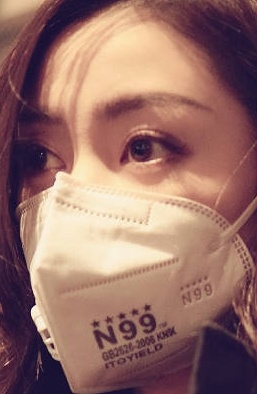

In [ ]:
cv2_imshow( img) 

In [ ]:
images = []
def load_images_from_folder(folder):
    path3= '/content/drive/My Drive/AFDB_masked_face_dataset'+'/'+str(folder)
    for filename in os.listdir(path3):
        path_file= path3 +'/'+str(filename)                                      #load images from a folder in masked dataset
        img = cv2.imread(path_file)
        images.append(img)

In [ ]:
path1 = '/content/drive/My Drive/AFDB_masked_face_dataset'

In [ ]:
folders = os.listdir(path1)

In [ ]:
for folder in folders:
 load_images_from_folder(folder)                                                 #loading images 

In [ ]:
for i in range (2142):
  images[i]= cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)                         #converted to Gray Scale

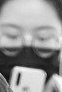

In [ ]:
cv2_imshow(images[0])

In [ ]:
for i in range (2142):
  images[i]= cv2.resize(images[i],(100,100))                                     #resizing the images

In [ ]:
for i in range (2142):
  images[i] = list(chain.from_iterable(images[i]))                               #flattening the 2 d list for each image

In [ ]:
df_masked = pd.DataFrame(images)                                                 #converting the array to dataframe

In [ ]:
df_masked['target']=0

For unmasked dataset 


In [ ]:
# drive.mount('AFDB_face_dataset_new')

In [ ]:
path_b = '/content/drive/My Drive/AFDB_face_dataset_new/axin/0_0_axin_0009.jpg'

In [ ]:
img_b = cv2.imread(path_b)

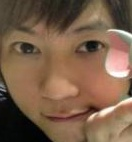

In [ ]:
cv2_imshow(img_b) 

In [ ]:
path1_b = '/content/drive/My Drive/AFDB_face_dataset_new'

In [ ]:
folders_b = os.listdir(path1_b)

In [ ]:
images_b=[]
def load_images_from_folder_b(folder):
    path3= '/content/drive/My Drive/AFDB_face_dataset_new'+'/'+str(folder)       #load images from a folder in unmasked dataset
    for filename in os.listdir(path3):
        path_file= path3 +'/'+str(filename)
        img = cv2.imread(path_file)
        images_b.append(img)

In [ ]:
for folder in folders_b:                                                          #loading all images
   load_images_from_folder_b(folder)

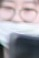

In [ ]:
cv2_imshow(images_b[0])

In [ ]:
images_b[0].shape

(58, 39, 3)

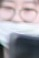

In [ ]:
cv2_imshow(images_b[0])

In [ ]:
len(images_b)

9614

In [ ]:
for i in range (9614):
  try:
   images_b[i]= cv2.cvtColor(images_b[i], cv2.COLOR_BGR2GRAY) 
  except:                                                                        #converting into GrayScale
    break

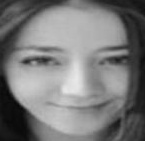

In [ ]:
cv2_imshow(images_b[1000])

In [ ]:
for i in range (9614):
  try:
   images_b[i]= cv2.resize(images_b[i],(100,100))
  except:
   break                                                                          #Resizing


In [ ]:
for i in range (5557):                                                            #flattening the 2d list(100 x 100) for each image
  images_b[i] = list(chain.from_iterable(images_b[i]))

In [ ]:
images_b= images_b[:5557]

In [ ]:
df_unmasked = pd.DataFrame(images_b)                                             #converting array to dataframe

In [ ]:
df_unmasked['target']=1

In [ ]:
df_unmasked.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,target
0,89,90,93,97,102,108,115,121,127,133,140,147,152,158,162,164,166,167,167,168,167,166,167,169,171,171,171,171,172,172,176,180,183,186,189,191,194,197,201,204,...,49,50,49,48,48,48,48,48,48,49,49,50,50,50,51,51,52,52,52,53,54,55,56,57,58,59,60,61,61,61,61,61,61,61,61,61,60,60,60,1
1,110,98,50,35,32,37,55,116,83,141,111,42,73,56,64,47,47,63,90,87,63,118,142,87,97,106,94,72,85,142,133,135,129,121,166,152,158,145,145,160,...,85,71,67,43,47,56,61,58,56,64,68,74,75,70,77,74,75,78,76,79,75,75,74,76,73,59,183,195,196,201,205,207,209,216,215,216,214,215,220,1
2,54,58,62,64,64,63,60,64,67,69,71,68,65,65,64,65,66,68,68,66,64,64,65,64,65,66,67,65,67,68,66,65,63,62,63,65,68,64,60,58,...,224,228,235,235,233,230,224,220,217,213,211,211,213,210,205,198,191,186,183,185,186,187,189,188,187,186,186,186,187,186,186,187,187,188,188,188,188,188,188,1
3,14,5,16,21,38,22,14,22,23,26,24,27,26,27,28,22,26,30,26,39,32,39,41,38,40,31,35,35,34,31,31,38,35,32,28,35,38,43,45,39,...,255,255,255,255,255,255,255,255,255,255,254,254,254,254,254,253,253,253,251,253,233,216,188,106,12,2,30,147,140,141,140,140,137,129,128,125,121,129,137,1
4,34,33,32,30,32,34,37,32,29,23,13,3,2,1,2,2,2,4,1,1,3,2,3,3,3,4,7,9,13,7,9,14,12,13,14,12,16,16,19,21,...,139,149,140,127,110,54,45,64,83,64,15,11,10,13,13,14,14,11,83,54,34,58,75,89,91,51,13,16,14,42,75,14,49,34,8,7,6,11,37,1


In [ ]:
df_unmasked.shape

(5557, 10001)

# To csv

In [ ]:
df_masked.to_csv('masked.csv')                                                   #creating csv file 'masked.csv'

In [ ]:
df_unmasked.to_csv('unmasked.csv')                                                #creating csv file 'unmasked.csv'

In [ ]:
df_whole = pd.concat([df_masked, df_unmasked])                                    # concatenating masked and unmasked dataframes

In [ ]:
df_whole.shape

(7699, 10001)

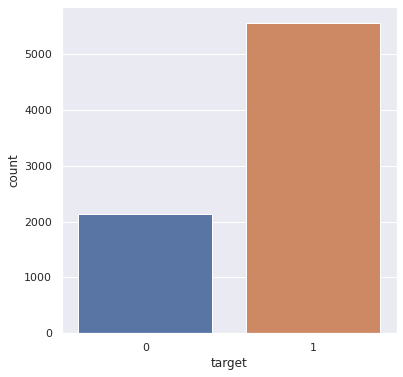

In [ ]:
figure(figsize=(6,6))
ax = sns.countplot(x="target", data=df_whole)

In [ ]:
y = df_whole['target']

In [ ]:
x= df_whole.drop('target', axis='columns')

# Random Forest

Without applying PCA/LDA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)     #Splitting into train-test

In [ ]:
clf = RandomForestClassifier(n_estimators= 200, max_depth=2, random_state=0)                  

In [ ]:
clf.fit(X_train, y_train)                                                                     #Fitting Random Forest classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
score_rf = clf.score(X_test, y_test)                                                       #Getting accuracy score for RF

In [ ]:
y_pred_rf = clf.predict(X_test)

In [ ]:
score_rf

0.8428571428571429

In [ ]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))
    plt.figure(figsize = (10,5))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,fmt='.0f',annot_kws={"size": 10})
    plt.show()

              precision    recall  f1-score   support

           0    0.84593   0.53839   0.65800      1081
           1    0.84219   0.96172   0.89799      2769

    accuracy                        0.84286      3850
   macro avg    0.84406   0.75005   0.77800      3850
weighted avg    0.84324   0.84286   0.83061      3850



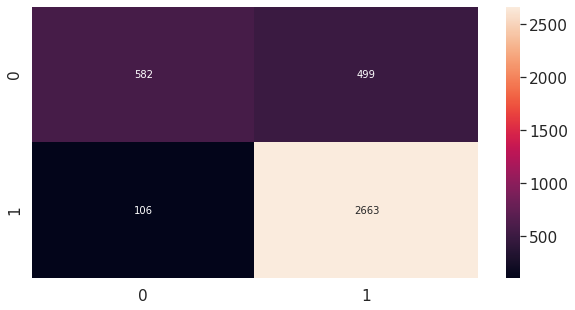

In [ ]:
print(metrics.classification_report(y_test, y_pred_rf,  digits=5))
plot_confusion_matrix(y_test, y_pred_rf)

After applying PCA


In [ ]:
pca = PCA(n_components=500)

In [ ]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=500, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_new= pca.transform(x)

In [ ]:
x_new.shape

(7699, 500)

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(x_new, y, test_size=0.5, random_state=42) 

In [ ]:
clf_pca = RandomForestClassifier(n_estimators= 200, max_depth=2, random_state=0)                  

In [ ]:
clf_pca.fit(X_train_pca, y_train_pca)                     

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
score_rf_pca = clf_pca.score(X_test_pca, y_test_pca)          

In [ ]:
score_rf_pca

0.7192207792207792

# Gaussian Naive Bayes

In [ ]:
clf_gaussian = GaussianNB()

In [ ]:
clf_gaussian.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
score_gauss = clf_gaussian.score(X_test, y_test)
print(score_gauss)

0.7883116883116883


In [ ]:
y_pred_gauss= clf_gaussian.predict(X_test)

              precision    recall  f1-score   support

           0    0.62384   0.61980   0.62181      1081
           1    0.85195   0.85410   0.85302      2769

    accuracy                        0.78831      3850
   macro avg    0.73789   0.73695   0.73742      3850
weighted avg    0.78790   0.78831   0.78810      3850



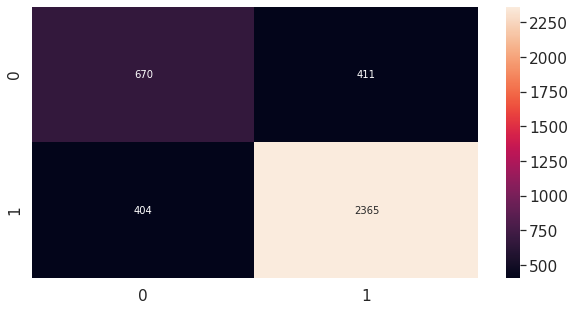

In [ ]:
print(metrics.classification_report(y_test, y_pred_gauss,  digits=5))
plot_confusion_matrix(y_test, y_pred_gauss)

# SVM 


Without normalising data

In [ ]:
from sklearn.svm import SVC
s = SVC().fit(X_train,y_train)

In [ ]:
score_SVM = s.score(X_test, y_test)
print(score_SVM)

0.8883116883116883


In [ ]:
y_pred_svm= s.predict(X_test)

SVM applied on Normalised data

In [ ]:
scaler = StandardScaler()
X_fit = scaler.fit(np.array(X_train))
X_train_s = scaler.transform(np.array(X_train))
X_test_s = scaler.transform(np.array(X_test))

In [ ]:
X_train_s

array([[ 1.35213493,  1.08684078,  0.84272594, ...,  0.02558672,
         0.07613131,  0.11321709],
       [-0.7770922 , -0.76514535, -0.717496  , ..., -1.1598479 ,
        -1.18291288, -1.20921033],
       [-0.76132014, -0.76514535, -0.79961294, ..., -0.5407876 ,
        -0.55339078, -0.55454329],
       ...,
       [-0.02003366,  0.05617024,  0.05440328, ...,  1.65885218,
         1.68928168,  1.65823129],
       [-0.28815856, -0.23370585, -0.25764111, ...,  0.03875821,
        -0.00255895, -0.03080966],
       [ 1.00514977,  1.34450842,  1.69674216, ..., -0.90958948,
        -0.90749696, -0.90806349]])

In [ ]:
s_s = SVC().fit(X_train_s,y_train)

In [ ]:
y_pred_s_s = s_s.predict(X_test_s)
from sklearn.metrics import accuracy_score
acc_s_s = accuracy_score(y_pred_s_s, y_test)
print("THE ACCURACY OF  SVM(Normalised) ",acc_s_s)

THE ACCURACY OF  SVM(Normalised)  0.8927272727272727


              precision    recall  f1-score   support

           0    0.83004   0.77706   0.80268      1081
           1    0.91508   0.93788   0.92634      2769

    accuracy                        0.89273      3850
   macro avg    0.87256   0.85747   0.86451      3850
weighted avg    0.89120   0.89273   0.89162      3850



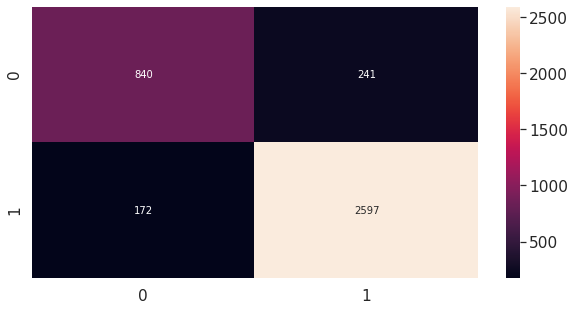

In [ ]:
print(metrics.classification_report(y_test, y_pred_s_s,  digits=5))
plot_confusion_matrix(y_test, y_pred_s_s)

# Accuracy Plots

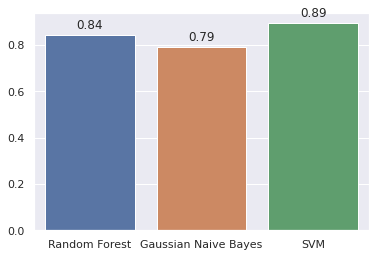

In [ ]:
sns.set()
splot = sns.barplot(x=['Random Forest', 'Gaussian Naive Bayes', 'SVM'],y=[score_rf, score_gauss, acc_s_s])
for p in splot.patches:
 splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')